In [1]:
import os,sys,glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.stats as st
import functions as fun
sourcedir = '/Volumes/My Passport/cmip5/cmip5'

In [2]:
def append_TA(TA,files,area):
    for fil in files:
        with xr.open_dataset(fil) as ds:
            ta = ds['tas'].values
        tt = ta[0::12]
        for f in range(1,12):
            ttnew = ta[f::12]
            tt = tt[:ttnew.shape[0]]+ttnew
        TA = np.append(TA,np.nansum((tt/12.)*area,axis=(1,2))/np.nansum(area))
    return TA

In [5]:
def gmst(model,scen):
    #Get surface area
    with xr.open_dataset(f'{sourcedir}/fx/areacella/{model}/r0i0p0/areacella_fx_{model}_historical_r0i0p0.nc') as ds:
        area = ds['areacella'].values

    #Historical
    files = glob.glob(f'{sourcedir}/{model}/r1i1p1/tas_Amon_{model}_historical*')
    TA = np.array([])
    TA = append_TA(TA,files,area)
    lastyear = np.int(files[-1][-9:-5])
    if lastyear>2005: TA = TA[:(2005-lastyear)]
    firstyear = np.int(files[0][-16:-12])
    
    #Future
    files = glob.glob(f'{sourcedir}/{model}/r1i1p1/tas_Amon_{model}_{scen}*')
    TA = append_TA(TA,files,area)
    years = np.arange(firstyear,firstyear+len(TA))
    
    #Pi control
    files = glob.glob(f'{sourcedir}/{model}/r1i1p1/tas_Amon_{model}_piControl*')
    TA_pi = np.array([])
    TA_pi = append_TA(TA_pi,files,area)
    
    #Detrend
    TA = fun.detrend(TA,TA_pi,years)

    plt.plot(years,TA)
    
    #Save data
    TA_lt = TA.copy()
    time_lt = years.copy()
    
    TA = TA_lt[np.logical_and(years>2005,years<2101)]
    time = time_lt[np.logical_and(years>2005,years<2101)]
    
    TA_lt = xr.DataArray(TA_lt,dims=('time_lt'),coords={'time_lt':time_lt})
    TA      = xr.DataArray(TA,dims=('time'),coords={'time':time})
    ds = xr.Dataset({'TA_lt':TA_lt,'TA':TA})
    ds.to_netcdf(f'../data/gmst/{model}_{scen}.nc')
    ds.close()
    
    print(scen,model,'Saved gmst')    


rcp45 bcc-csm1-1 Saved gmst
rcp45 CanESM2 Saved gmst
rcp45 CCSM4 Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp45 CNRM-CM5 Saved gmst
rcp45 CSIRO-Mk3-6-0 Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/

rcp45 GFDL-CM3 Saved gmst
rcp45 GISS-E2-R Saved gmst
rcp45 HadGEM2-ES Saved gmst
rcp45 inmcm4 Saved gmst
rcp45 IPSL-CM5A-LR Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp45 MIROC-ESM Saved gmst
rcp45 MIROC5 Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp45 MPI-ESM-LR Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


rcp45 MRI-CGCM3 Saved gmst
rcp45 NorESM1-M Saved gmst
rcp85 bcc-csm1-1 Saved gmst
rcp85 CanESM2 Saved gmst
rcp85 CCSM4 Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp85 CNRM-CM5 Saved gmst
rcp85 CSIRO-Mk3-6-0 Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


rcp85 GFDL-CM3 Saved gmst
rcp85 GISS-E2-R Saved gmst
rcp85 HadGEM2-ES Saved gmst
rcp85 inmcm4 Saved gmst
rcp85 IPSL-CM5A-LR Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp85 MIROC-ESM Saved gmst
rcp85 MIROC5 Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp85 MPI-ESM-LR Saved gmst


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


rcp85 MRI-CGCM3 Saved gmst
rcp85 NorESM1-M Saved gmst


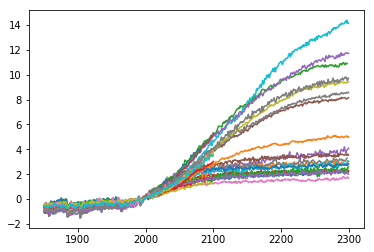

In [6]:
mods = fun.models()
for scen in ['rcp45','rcp85']:
    for model in mods:
        gmst(model,scen)